## Data Description:

In [5]:
import numpy as np 
import pandas as pd

C:\Users\HP\AppData\Local\Temp\ipykernel_19792\118197663.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
pip install pandas

In [7]:
import numpy as np 
import pandas as pd


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Data Collection:

In [9]:
df=pd.read_csv("Downloads/bigmart (1).csv")

In [10]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Preprocessing - Data Cleaning:

In [11]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
df["Item_Weight"] = df["Item_Weight"].fillna(df["Item_Weight"].mean())


In [15]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])


In [16]:
df.shape

(8523, 12)

In [25]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [21]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'LF', 'reg'], dtype=object)

In [22]:
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace('low fat','Low Fat')

In [23]:
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace('LF','Low Fat')

In [24]:
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace('reg','Regular')

## Exploratory Data Analysis (EDA):

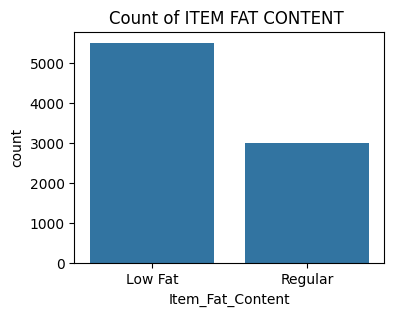

In [26]:
plt.figure(figsize=(4,3))
sns.countplot(x="Item_Fat_Content",data=df)
plt.title("Count of ITEM FAT CONTENT ")
plt.show()

In [27]:
df['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [28]:
x= df['Outlet_Type'].value_counts().index
y=df['Outlet_Type'].value_counts().values

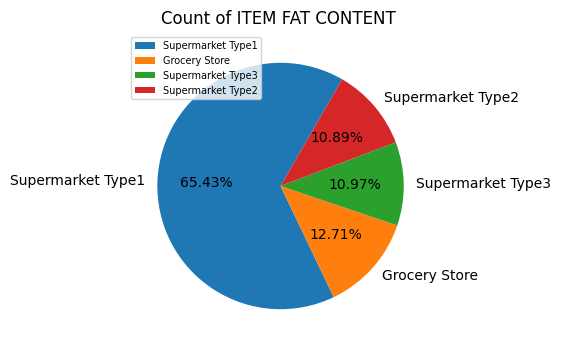

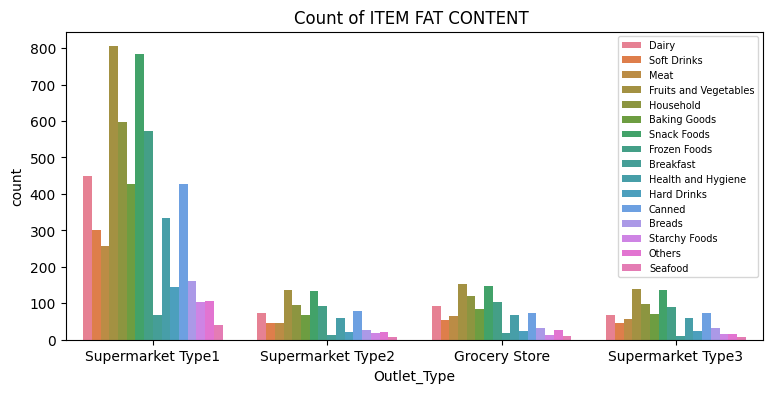

In [29]:
plt.figure(figsize=(5,4))
plt.pie(y,labels=x,startangle = 60,autopct="%0.2f%%")
plt.legend(fontsize= 7,loc=2)
plt.title("Count of ITEM FAT CONTENT ")
plt.show()
plt.figure(figsize=(9,4))
sns.countplot(x="Outlet_Type",data=df,hue="Item_Type")
plt.legend(fontsize= 7,loc=1)
plt.title("Count of ITEM FAT CONTENT ")
plt.show()

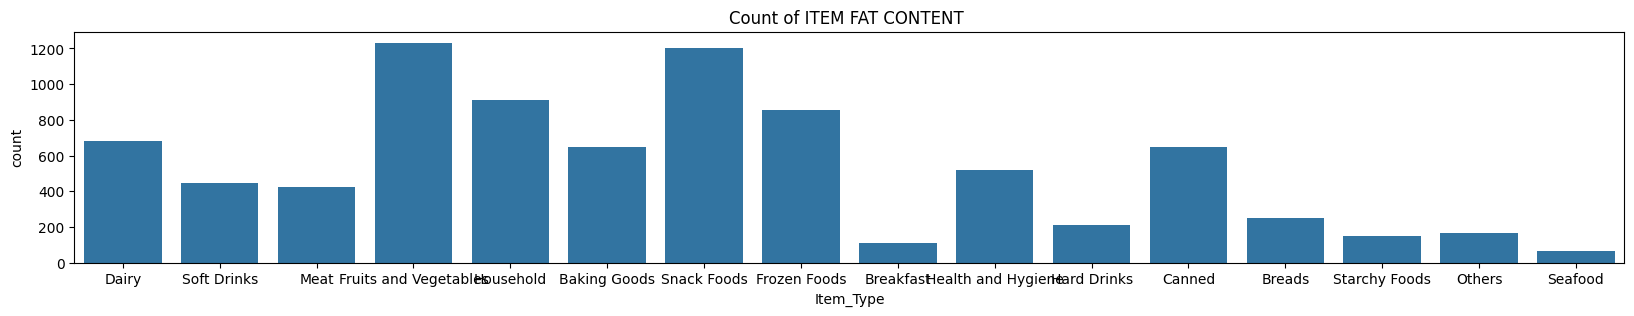

In [30]:
plt.figure(figsize=(20,3))
sns.countplot(x="Item_Type",data=df)
plt.title("Count of ITEM FAT CONTENT ")
plt.show()

In [31]:
numeric_df = df.select_dtypes(include=[np.number])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
df_cleaned = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]


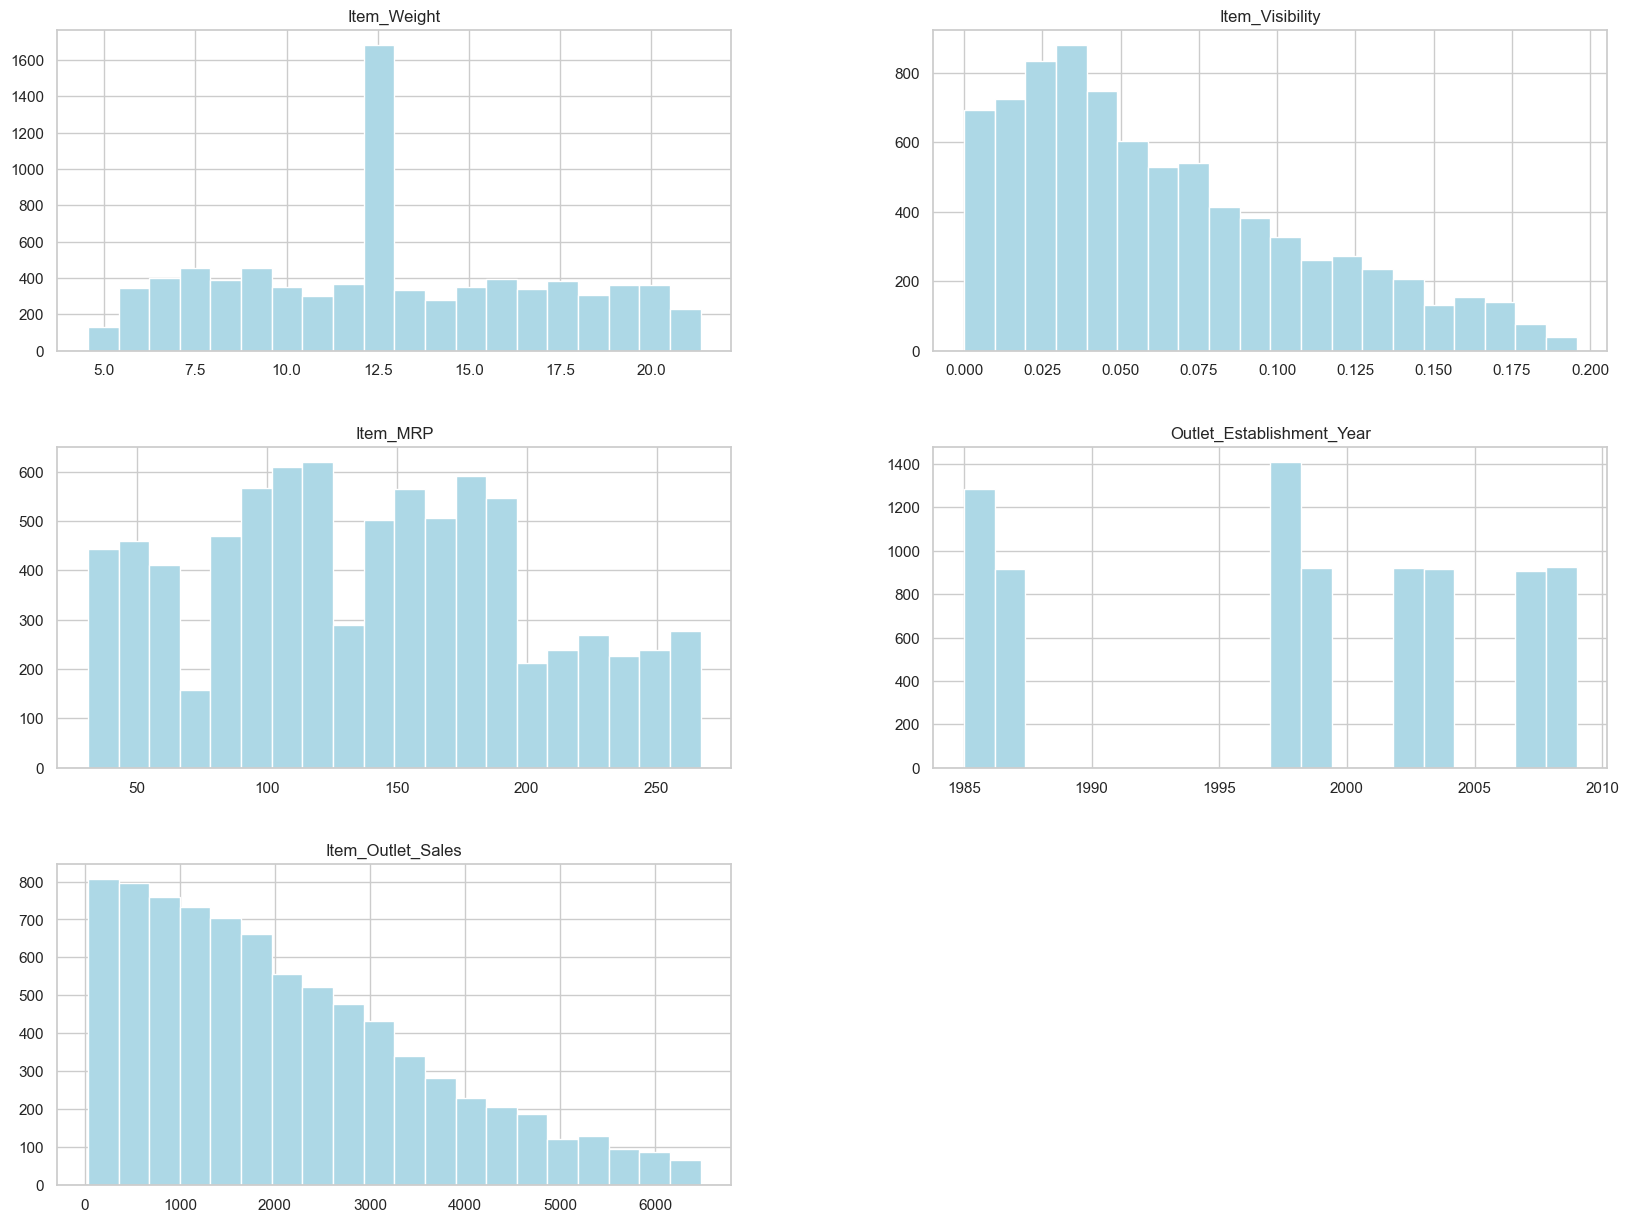

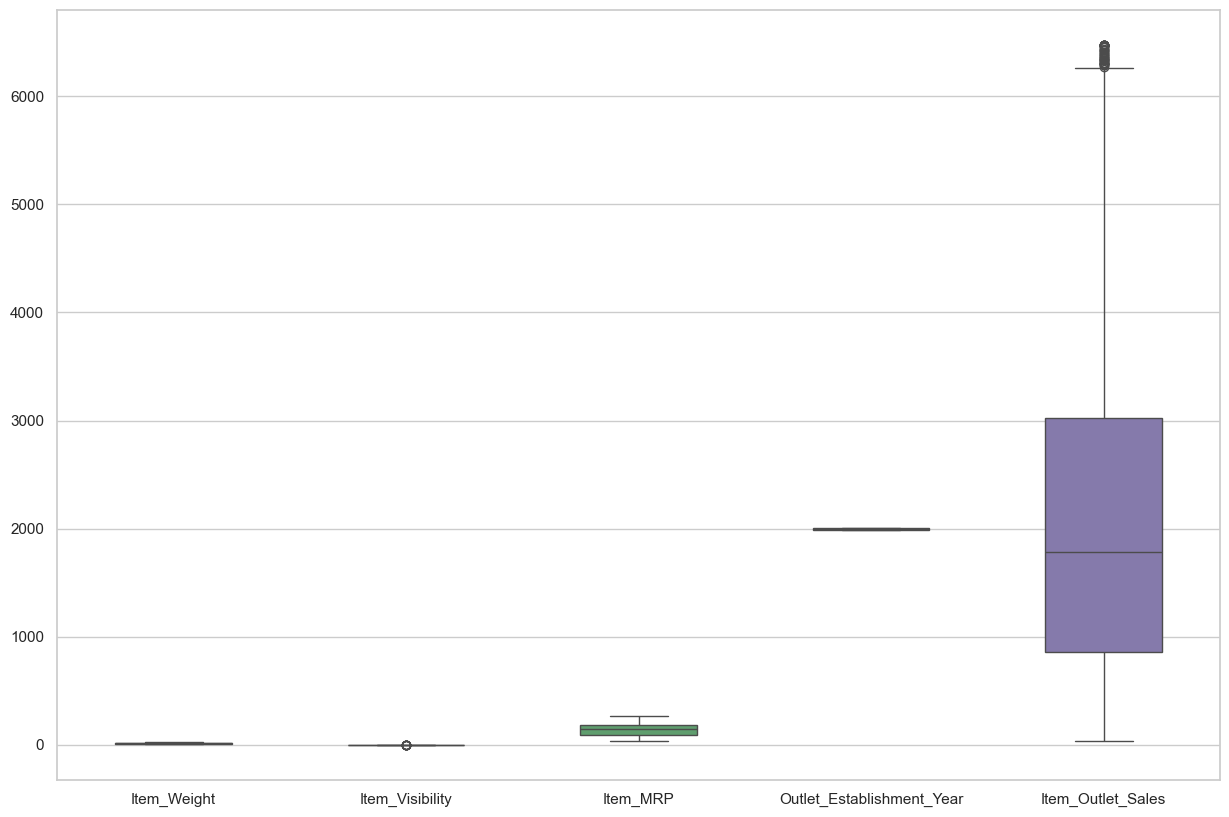

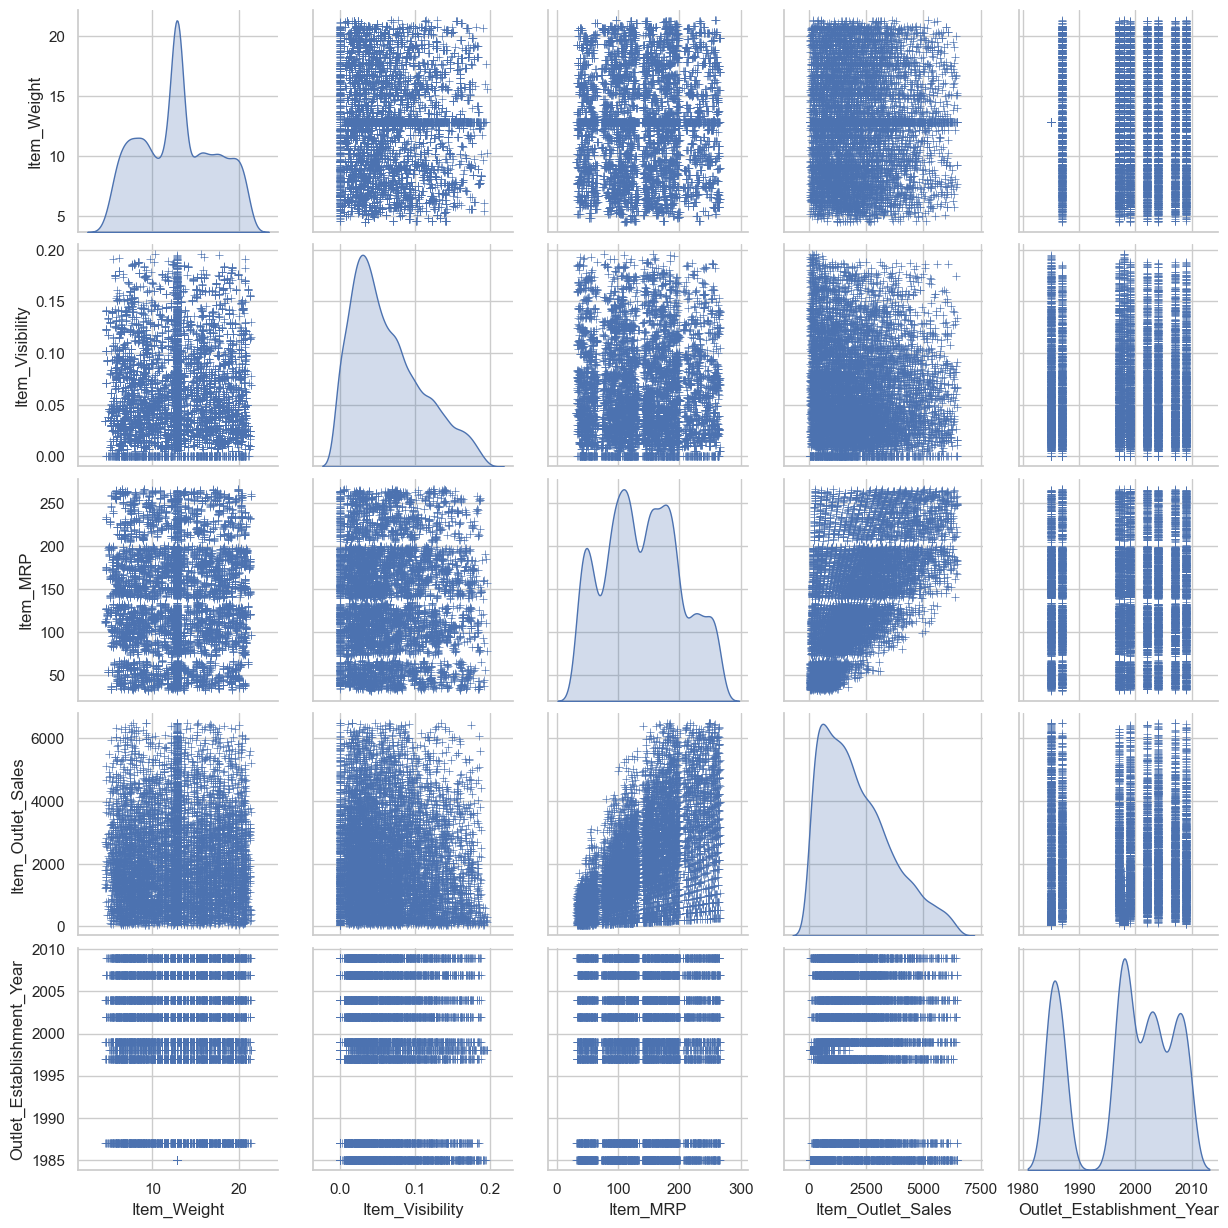

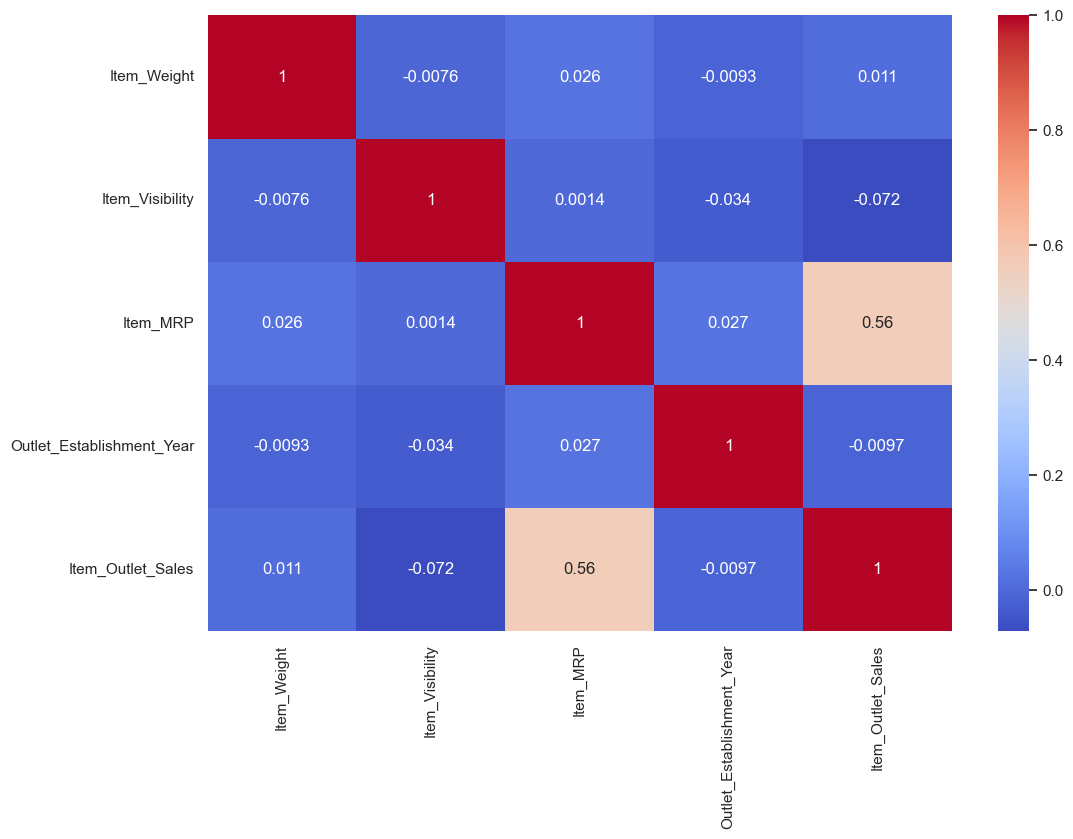

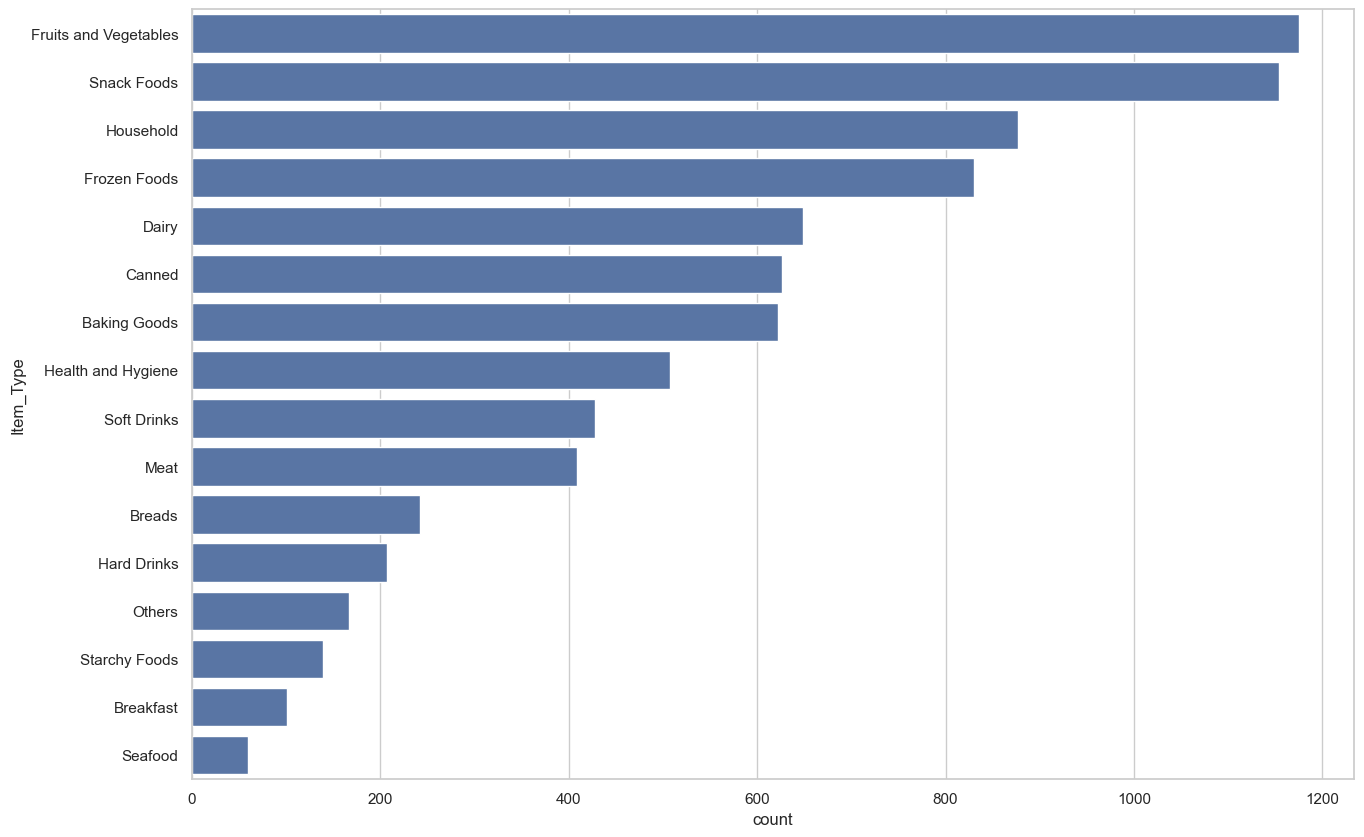

In [32]:
sns.set(style="whitegrid")


# Histogram for numerical features
df_cleaned.hist(bins=20, figsize=(20, 15), color='lightblue')
plt.show()

# Boxplot to check for any remaining outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_cleaned, width=0.5)
plt.show()

# Pair plot to see relationships between numerical variables only
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Establishment_Year']
sns.pairplot(df_cleaned[numerical_features], diag_kind='kde', markers='+')
plt.show()

# Select only numerical features for the heatmap
numerical_features = df_cleaned.select_dtypes(include=[float, int])

# Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.show()

# Bar plot for categorical features
plt.figure(figsize=(15, 10))
sns.countplot(y='Item_Type', data=df_cleaned, order=df_cleaned['Item_Type'].value_counts().index)
plt.show()

## Feature Engineering:

In [33]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding for binary categorical columns and One-Hot Encoding for others
label_encoder = LabelEncoder()
for col in categorical_cols:
    if df[col].nunique() == 2:
        df[col] = label_encoder.fit_transform(df[col])
    else:
        data = pd.get_dummies(df, columns=[col], drop_first=True)

# Display the first few rows of the modified dataset
data.head()



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,3735.1380,True,False,False
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,443.4228,False,True,False
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,2097.2700,True,False,False
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,732.3800,False,False,False
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,994.7052,True,False,False


## Feature Selection:

In [36]:
df = pd.get_dummies(df, drop_first=True)

# 3. Feature Selection: Use Random Forest and SelectKBest
X = df.drop(columns=['Item_Outlet_Sales'])  # Assuming 'Item_Outlet_Sales' is the target variable
y = df['Item_Outlet_Sales']


In [37]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=10)
X_selected = selector.fit_transform(X, y)


## Split Data into Training and Testing Sets:

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Building the ML Model , Model Evaluation and hyperparameter Tuning:

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
import joblib
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR(),
    'MLP Regressor': MLPRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'Gradient Boost': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42)
}

# Evaluate the models
results = {}
   
from sklearn.neural_network import MLPRegressor

# Initialize the MLPRegressor with increased iterations and adjusted learning rate
mlp = MLPRegressor(random_state=42, max_iter=1000, learning_rate_init=0.001)

# Fit the model
mlp.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = mlp.predict(X_test_scaled)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2 Score: {r2}")

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

# 7. Hyperparameter Tuning for Random Forest 
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best parameters for Random Forest:", grid_search.best_params_)

MAE: 780.621170624617, MSE: 1164432.6488874282, RMSE: 1079.0888049124726, R2 Score: 0.5715800320285014
Empty DataFrame
Columns: []
Index: []
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


## Save the Model:

In [41]:
# 8. Save the Best Model
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'best_random_forest_model.pkl')

['best_random_forest_model.pkl']

## Test with Unseen Data:

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on the test set
y_pred =best_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R2 Score: {r2}')


Mean Absolute Error (MAE): 2492.535798881843
Mean Squared Error (MSE): 7709815.4006241355
Root Mean Squared Error (RMSE): 2776.65543426334
R2 Score: -1.8366079138690323


## Interpretation of Results (Conclusion):

In [45]:

print("Model Performance on Test Data:")
print(f"MAE: {mae} - The average magnitude of the errors in predictions is {mae}.")
print(f"MSE: {mse} - The model's average squared error is {mse}, which emphasizes larger errors.")
print(f"RMSE: {rmse} - The root mean squared error indicates that on average, the model's predictions are off by {rmse} units.")
print(f"R2 Score: {r2} - The R2 score of {r2} shows how well the model's predictions fit the actual data. An R2 closer to 1 indicates a better fit.")

# Discuss any limitations
print("Conclusion:")
print("While the model provides a good fit, it may be limited by the following factors:")
print("- Potential overfitting if R2 on training data is significantly higher than on test data.")
print("- The dataset may have imbalanced or insufficient data for certain features.")
print("- Missing or inaccurate data could affect the model's predictive power.")


Model Performance on Test Data:
MAE: 2492.535798881843 - The average magnitude of the errors in predictions is 2492.535798881843.
MSE: 7709815.4006241355 - The model's average squared error is 7709815.4006241355, which emphasizes larger errors.
RMSE: 2776.65543426334 - The root mean squared error indicates that on average, the model's predictions are off by 2776.65543426334 units.
R2 Score: -1.8366079138690323 - The R2 score of -1.8366079138690323 shows how well the model's predictions fit the actual data. An R2 closer to 1 indicates a better fit.
Conclusion:
While the model provides a good fit, it may be limited by the following factors:
- Potential overfitting if R2 on training data is significantly higher than on test data.
- The dataset may have imbalanced or insufficient data for certain features.
- Missing or inaccurate data could affect the model's predictive power.
